In [1]:
import pandas as pd

In [4]:
iris = pd.read_csv('Iris.csv').drop(['Id'],axis=1)

In [5]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Preprocessing

In [23]:
iris.shape

(150, 5)

In [25]:
iris.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [26]:
iris.duplicated().sum()

3

In [27]:
iris.drop_duplicates(inplace=True)

# EDA 

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='count', ylabel='Species'>

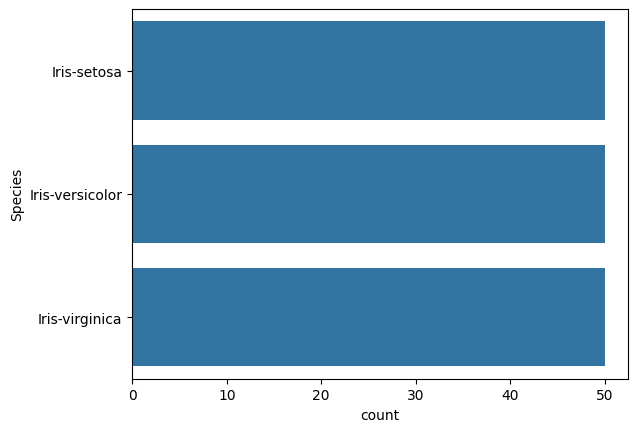

In [11]:
sns.countplot(iris['Species'])

<Axes: ylabel='count'>

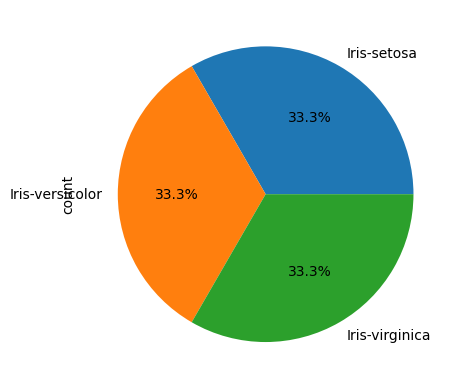

In [16]:
species_count = iris['Species'].value_counts()

species_count.plot(kind='pie', autopct='%1.1f%%')

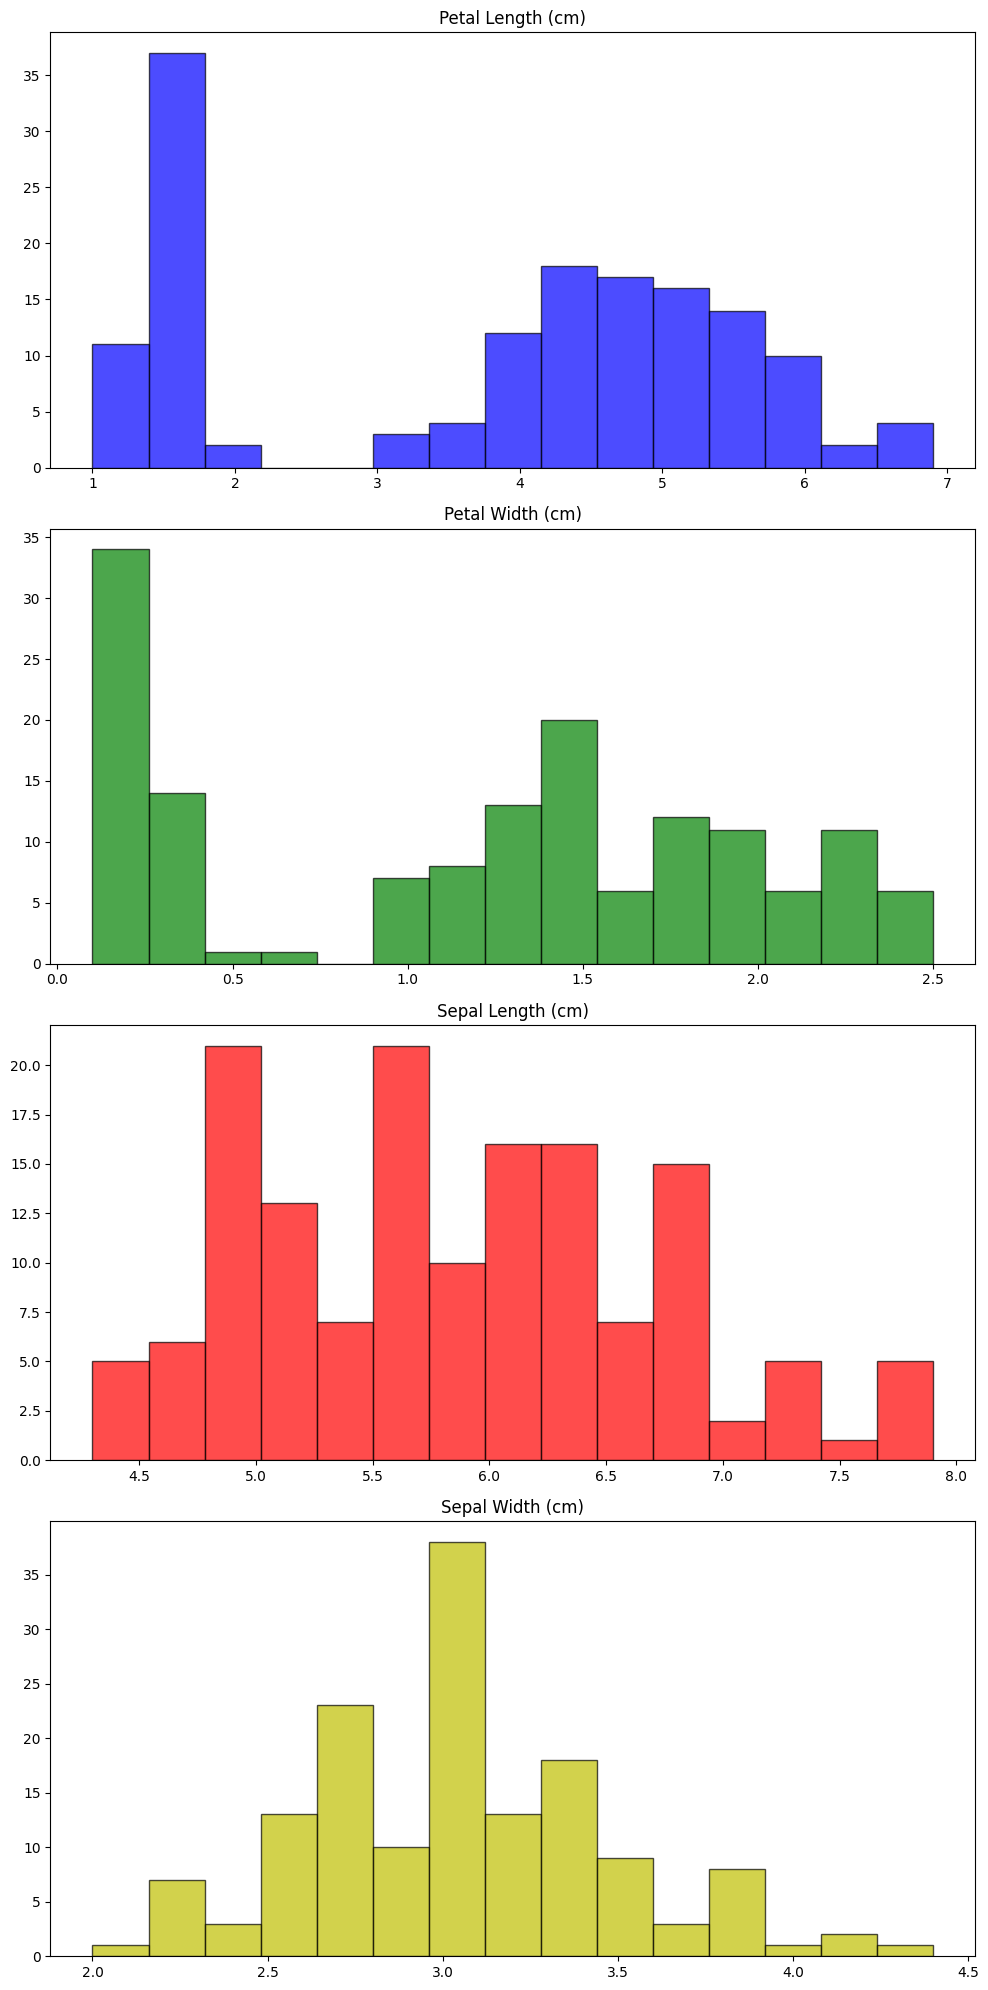

In [21]:
plt.figure(figsize=(10, 20))

plt.subplot(4, 1, 1)
plt.hist(iris['PetalLengthCm'], bins=15, color='b', alpha=0.7,edgecolor='black')
plt.title('Petal Length (cm)')

plt.subplot(4, 1, 2)
plt.hist(iris['PetalWidthCm'], bins=15, color='g', alpha=0.7,edgecolor='black')
plt.title('Petal Width (cm)')

plt.subplot(4, 1, 3)
plt.hist(iris['SepalLengthCm'], bins=15, color='r', alpha=0.7,edgecolor='black')
plt.title('Sepal Length (cm)')

plt.subplot(4, 1, 4)
plt.hist(iris['SepalWidthCm'], bins=15, color='y', alpha=0.7,edgecolor='black')
plt.title('Sepal Width (cm)')

plt.tight_layout()
plt.show()


# Model Training

In [28]:
X = iris.drop(['Species'],axis=1)
y = iris['Species']

In [29]:
from sklearn.model_selection import train_test_split
Xtrain , Xtest , Ytrain , Ytest = train_test_split(X,y,test_size=0.2)

In [31]:
from sklearn.cluster import KMeans

In [37]:
K = KMeans(n_clusters=3)
K.fit(Xtrain,Ytrain)

c:\Users\shame\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [38]:
prediction = K.predict(Xtest)

In [41]:
iris.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


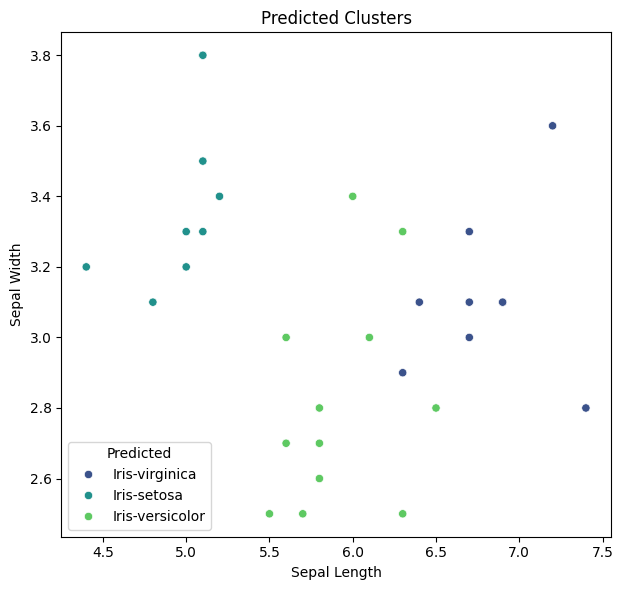

In [49]:
from sklearn.preprocessing import LabelEncoder
df_test = Xtest.copy()
df_test['Actual'] = Ytest.values
df_test['Predicted'] = prediction

le = LabelEncoder()
df_test['ActualEncoded'] = le.fit_transform(df_test['Actual'])

label_mapping = {}
for i in range(3):
    mask = df_test['Predicted'] == i
    most_common = df_test[mask]['ActualEncoded'].mode()[0]
    label_mapping[i] = le.inverse_transform([most_common])[0]

df_test['Predicted'] = df_test['Predicted'].map(label_mapping)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
sns.scatterplot(x=df_test['SepalLengthCm'], y=df_test['SepalWidthCm'], hue=df_test['Predicted'], palette='viridis')
plt.title('Predicted Clusters')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.tight_layout()
plt.show()